In [54]:

import math
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, GRU,LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings


In [55]:
plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")


In [91]:
dataSet=pd.read_csv('./AAPL (1).csv')
dataSet["Date"] = pd.to_datetime(dataSet["Date"], infer_datetime_format=True)
dataset = dataSet.set_index("Date")
data_close = dataset['Close']
df = dataset['Close']

In [92]:
data_close

Date
2012-01-03    14.686786
2012-01-04    14.765714
2012-01-05    14.929643
2012-01-06    15.085714
2012-01-09    15.061786
                ...    
2019-12-05    66.394997
2019-12-06    67.677498
2019-12-09    66.730003
2019-12-10    67.120003
2019-12-11    67.692497
Name: Close, Length: 1999, dtype: float64

<Axes: title={'center': "AAPL 'Close'"}, xlabel='Date', ylabel='Close Price'>

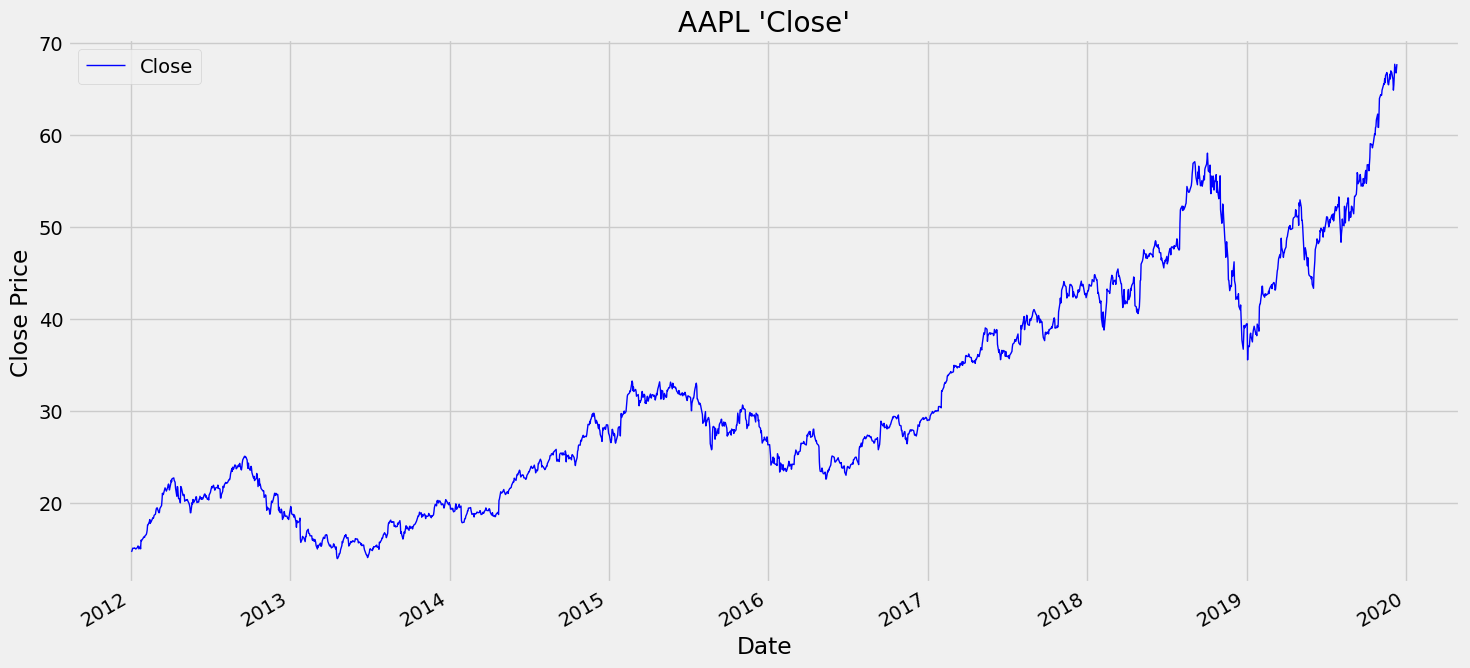

In [93]:
data_close.plot(figsize=(16,8),color="blue",xlabel='Date',ylabel='Close Price',title="AAPL 'Close'",legend="Close",linewidth=1)

Get Number of train data


In [94]:
len_data_train = math.ceil(len(df)*.85)


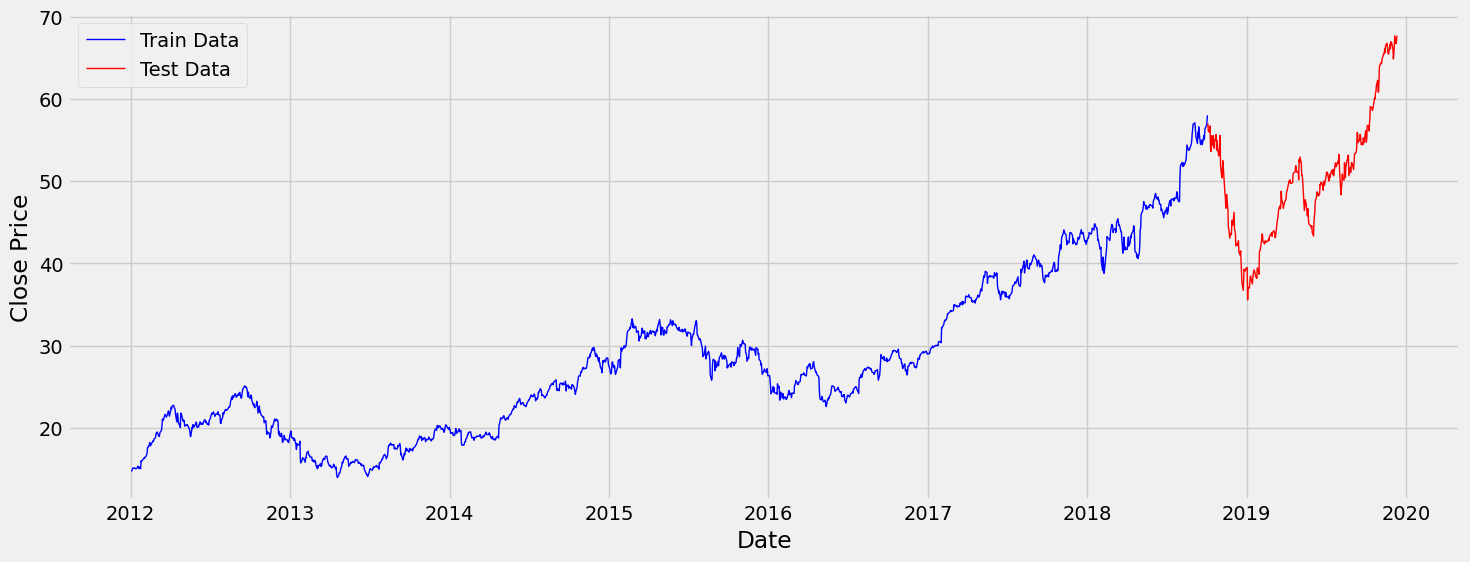

In [95]:
train=df[:len_data_train]
test=df[len_data_train:]
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(train,"blue",label="Train Data",linewidth=1)
plt.plot(test,"red",label="Test Data",linewidth=1)
plt.legend()
plt.show()

In [96]:
scaler = MinMaxScaler()
df = np.array(df).reshape(len(df),1)
scaler_data = scaler.fit_transform(df)

Split Data to train & test


In [97]:
# create the training data
train_data = scaler_data[0:len_data_train, :]
timestep = 60
# split the train data
x_train = []
y_train = []
for i in range(timestep, len(train_data)):
    x_train.append(train_data[i-timestep:i, 0])
    y_train.append(train_data[i, 0])

# convert the data to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [98]:
x_train[0]

array([[0.01375544],
       [0.015224  ],
       [0.01827413],
       [0.02117805],
       [0.02073283],
       [0.02173624],
       [0.02127772],
       [0.02050689],
       [0.01945696],
       [0.02270643],
       [0.02563694],
       [0.0247332 ],
       [0.01978257],
       [0.02450727],
       [0.01985567],
       [0.03729916],
       [0.03595019],
       [0.03771116],
       [0.0415188 ],
       [0.04382466],
       [0.04363197],
       [0.04292094],
       [0.04595112],
       [0.04880186],
       [0.05203143],
       [0.05724786],
       [0.06820568],
       [0.06837182],
       [0.07447207],
       [0.07903061],
       [0.07119602],
       [0.07421288],
       [0.0741531 ],
       [0.08261236],
       [0.08140957],
       [0.08363567],
       [0.08763605],
       [0.08986219],
       [0.09627475],
       [0.10094625],
       [0.10229521],
       [0.10276705],
       [0.09477961],
       [0.09285249],
       [0.09313825],
       [0.10064727],
       [0.10276041],
       [0.107

In [99]:
 # create the data test
test_data = scaler_data[len_data_train-timestep:, :]

# create x_test & y_test
x_test = []
y_test = df[len_data_train:, :]
for i in range(timestep, len(test_data)):
    x_test.append(test_data[i-timestep:i, 0])

# convert the data to a numpy array
x_test = np.array(x_test)

# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


Build And Train LSTM-GRU Model


In [100]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,
              input_shape=(x_train.shape[1], 1)))
model.add(GRU(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# Compile the Model
model.compile(optimizer="adam", loss="mean_squared_error")
# Train the model
model.fit(x_train, y_train, epochs=25)

Epoch 1/25
52/52 [==============================] - 38s 251ms/step - loss: 0.0062
Epoch 2/25
52/52 [==============================] - 12s 226ms/step - loss: 2.5809e-04
Epoch 3/25
52/52 [==============================] - 11s 214ms/step - loss: 2.4167e-04
Epoch 4/25
52/52 [==============================] - 11s 209ms/step - loss: 2.2942e-04
Epoch 5/25
52/52 [==============================] - 12s 238ms/step - loss: 2.2635e-04
Epoch 6/25
52/52 [==============================] - 11s 217ms/step - loss: 2.1693e-04
Epoch 7/25
52/52 [==============================] - 11s 210ms/step - loss: 2.1304e-04
Epoch 8/25
52/52 [==============================] - 11s 208ms/step - loss: 2.0153e-04
Epoch 9/25
52/52 [==============================] - 12s 224ms/step - loss: 2.1073e-04
Epoch 10/25
52/52 [==============================] - 11s 210ms/step - loss: 2.0123e-04
Epoch 11/25
52/52 [==============================] - 12s 226ms/step - loss: 1.9601e-04
Epoch 12/25
52/52 [==============================] - 12s

In [101]:
# Prodection the data values
pred = model.predict(x_test)
prediction = scaler.inverse_transform(pred)


10/10 [==============================] - 9s 124ms/step


Plot Train & Test & Prediction 


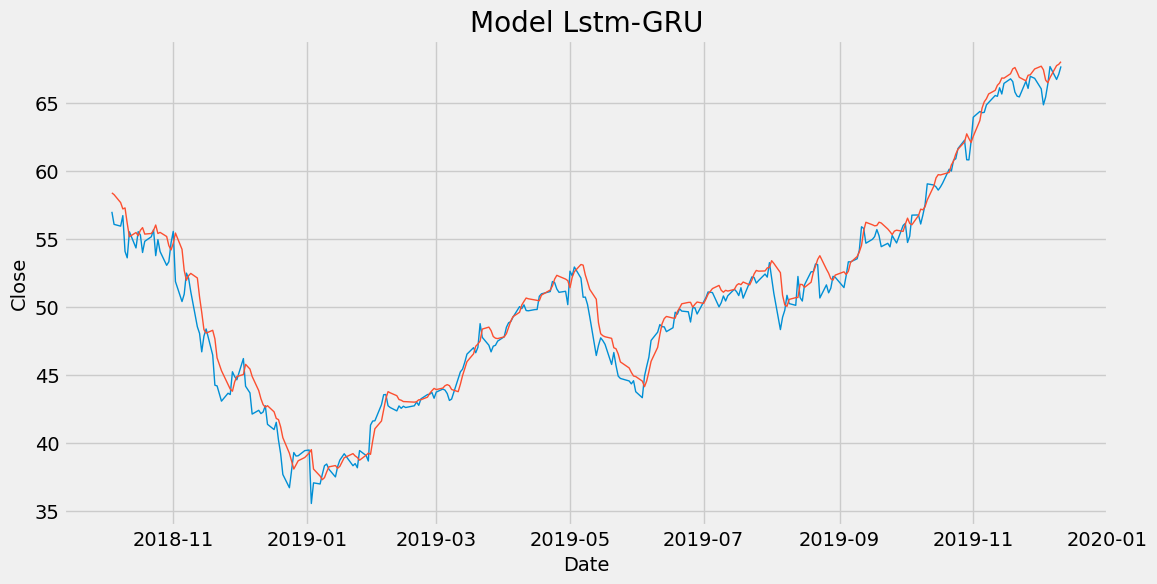

In [102]:
data_range = data_close[len_data_train:].index
train = data_close[:len_data_train]
actual = data_close[len_data_train:]
plt.figure(figsize=(12, 6))
plt.title("Model Lstm-GRU")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close", fontsize=14)
# plt.plot(train,"green", linewidth=1)
plt.plot(data_range,actual,linewidth=1)
plt.plot(data_range,prediction,linewidth=1)
plt.show()

In [103]:
print(f"MAE : {mean_absolute_error(actual,prediction)}")
print(f"MSE : {mean_squared_error(actual,prediction)}")



MAE : 0.8861281868190192
MSE : 1.4122646935174215
